In [2]:
import pandas as pd
data = pd.read_csv("data/movie_database.csv")
print(data.head())

             title  vote_average  vote_count release_date     revenue  \
0        Inception         8.364       34495   2010-07-15   825532764   
1     Interstellar         8.417       32571   2014-11-05   701729206   
2  The Dark Knight         8.512       30619   2008-07-16  1004558444   
3           Avatar         7.573       29815   2009-12-15  2923706026   
4     The Avengers         7.710       29166   2012-04-25  1518815515   

   runtime     budget  popularity  \
0      148  160000000      83.952   
1      169  165000000     140.241   
2      152  185000000     130.643   
3      162  237000000      79.932   
4      143  220000000      98.082   

                                              genres  n_ad_breaks  \
0         ['Action', 'Science Fiction', 'Adventure']            5   
1          ['Adventure', 'Drama', 'Science Fiction']            6   
2           ['Drama', 'Action', 'Crime', 'Thriller']            6   
3  ['Action', 'Adventure', 'Fantasy', 'Science Fi...          

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       5920 non-null   object 
 1   vote_average                5920 non-null   float64
 2   vote_count                  5920 non-null   int64  
 3   release_date                5920 non-null   object 
 4   revenue                     5920 non-null   int64  
 5   runtime                     5920 non-null   int64  
 6   budget                      5920 non-null   int64  
 7   popularity                  5920 non-null   float64
 8   genres                      5920 non-null   object 
 9   n_ad_breaks                 5920 non-null   int64  
 10  runtime_with_ads            5920 non-null   float64
 11  scaled_popularity           5920 non-null   float64
 12  children_scaled_popularity  5920 non-null   float64
 13  adults_scaled_popularity    5920 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
def analyze_movie_data(file_path):
    # Load dataset
    df = pd.read_csv(file_path)

    # Rename columns for easier access and consistency
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

    # Convert 'release_date' to datetime format
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

    # Display basic info
    print("\nFirst few rows of the dataset:")
    print(df.head())
    print("\nDataset information:")
    df.info()
    print("\nSummary statistics:")
    print(df.describe())
    print("\nMissing values per column:")
    print(df.isnull().sum())

    # Distribution of vote averages
    plt.figure(figsize=(8, 4))
    sns.histplot(df['vote_average'], kde=True, bins=20)
    plt.title('Distribution of Vote Averages')
    plt.xlabel('Vote Average')
    plt.ylabel('Frequency')
    plt.show()

    # Distribution of revenue and budget
    plt.figure(figsize=(8, 4))
    sns.histplot(df['revenue'], kde=True, bins=20)
    plt.title('Distribution of Revenue')
    plt.xlabel('Revenue')
    plt.ylabel('Frequency')
    plt.xscale('log')  # Log scale for better visibility
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.histplot(df['budget'], kde=True, bins=20)
    plt.title('Distribution of Budget')
    plt.xlabel('Budget')
    plt.ylabel('Frequency')
    plt.xscale('log')  # Log scale for better visibility
    plt.show()

    # Popularity distribution
    plt.figure(figsize=(8, 4))
    sns.histplot(df['popularity'], kde=True, bins=20)
    plt.title('Distribution of Popularity')
    plt.xlabel('Popularity')
    plt.ylabel('Frequency')
    plt.show()

    # Release date trends
    plt.figure(figsize=(12, 6))
    df['release_year'] = df['release_date'].dt.year
    sns.countplot(data=df, x='release_year')
    plt.title('Number of Movies Released by Year')
    plt.xlabel('Release Year')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45)
    plt.show()

    # Relationship between budget and revenue using transformed data
    plt.figure(figsize=(10, 6))
    
    # Transforming data for log scale
    log_budget = np.log1p(df['budget'])  # log1p handles log(0) properly
    log_revenue = np.log1p(df['revenue'])
    
    # Scatter plot with regression line
    sns.regplot(x=log_budget, y=log_revenue, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title('Budget vs Revenue with Regression Line (Log Scale)')
    plt.xlabel('Log(Budget)')
    plt.ylabel('Log(Revenue)')
    plt.show()

   # Select a subset of movies for clearer visualization (30 movies)
    subset = df.sample(n=30, random_state=1)

    # Calculate the difference between revenue and budget
    df['profit'] = df['revenue'] - df['budget']

   # Calculate the difference between revenue and budget
    subset['profit'] = subset['revenue'] - subset['budget']

    # Horizontal bar plot for Budget and Revenue
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    index = range(len(subset))

    # Create horizontal bars for Budget
    plt.barh(index, subset['budget'], bar_width, label='Budget', color='skyblue')
    
    # Create horizontal bars for Revenue, offset by bar width
    plt.barh([i + bar_width for i in index], subset['revenue'], bar_width, label='Revenue', color='orange')
    
    plt.yticks([i + bar_width / 2 for i in index], subset['title'])  # Movie titles on y-axis
    plt.xlabel('Amount ($)', fontsize=14)
    plt.title('Budget vs Revenue for Selected Movies', fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Bar plot for Profit (Revenue - Budget)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=subset, x='title', y='profit')
    plt.axhline(0, color='black', linewidth=1, linestyle='--')  # Line at y=0 for reference
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Movies', fontsize=14)
    plt.ylabel('Profit ($)', fontsize=14)
    plt.title('Profit (Revenue - Budget) for Selected Movies', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Heatmap of correlations
    plt.figure(figsize=(12, 8))
    
    # Select only numeric columns for correlation
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numeric_cols].corr()

    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(correlation_matrix))
    plt.title('Correlation Heatmap')
    plt.show()

    # Distribution of genres
    plt.figure(figsize=(12, 6))
    # Ensure correct parsing and counting of genres
    genre_counts = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else []).explode().value_counts()
    
    # Plotting genres
    genre_counts.plot(kind='bar', color='cornflowerblue')
    plt.title(' Genres by Count')
    plt.xlabel('Genres')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    print("\nEDA Complete.")


First few rows of the dataset:
             title  vote_average  vote_count release_date     revenue  \
0        Inception         8.364       34495   2010-07-15   825532764   
1     Interstellar         8.417       32571   2014-11-05   701729206   
2  The Dark Knight         8.512       30619   2008-07-16  1004558444   
3           Avatar         7.573       29815   2009-12-15  2923706026   
4     The Avengers         7.710       29166   2012-04-25  1518815515   

   runtime     budget  popularity  \
0      148  160000000      83.952   
1      169  165000000     140.241   
2      152  185000000     130.643   
3      162  237000000      79.932   
4      143  220000000      98.082   

                                              genres  n_ad_breaks  \
0         ['Action', 'Science Fiction', 'Adventure']            5   
1          ['Adventure', 'Drama', 'Science Fiction']            6   
2           ['Drama', 'Action', 'Crime', 'Thriller']            6   
3  ['Action', 'Adventure', 'Fa

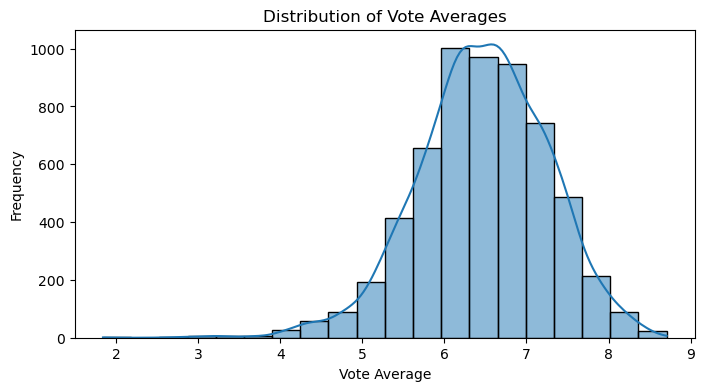

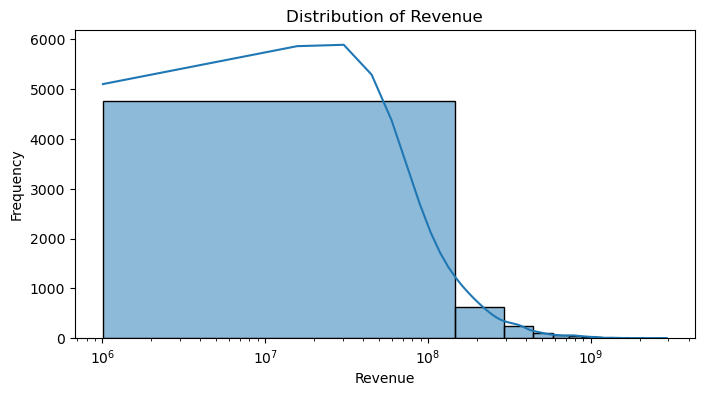

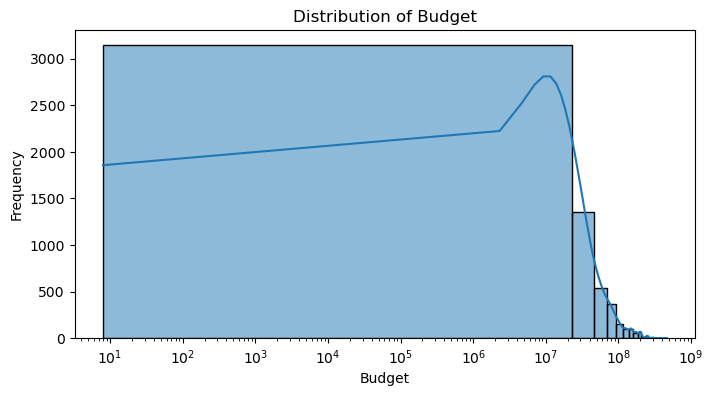

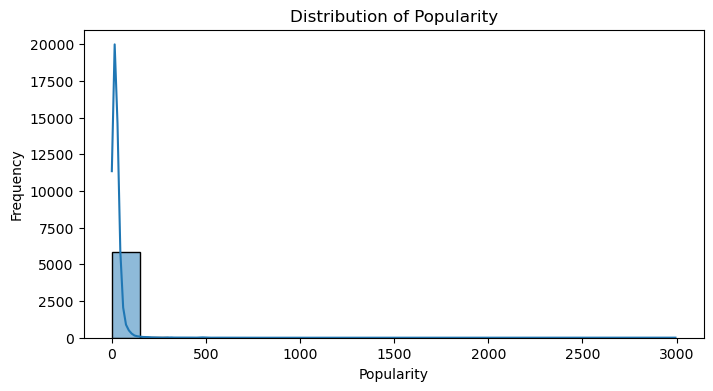

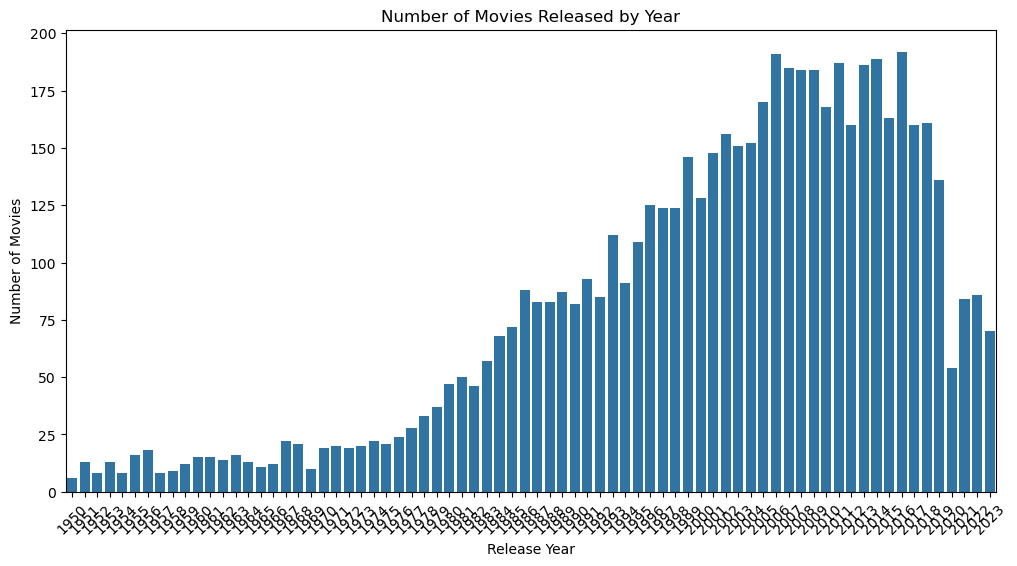

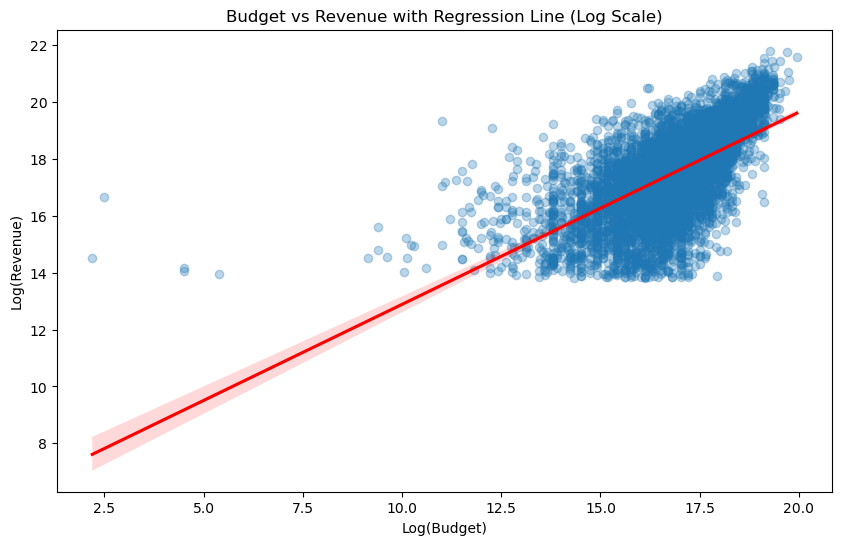

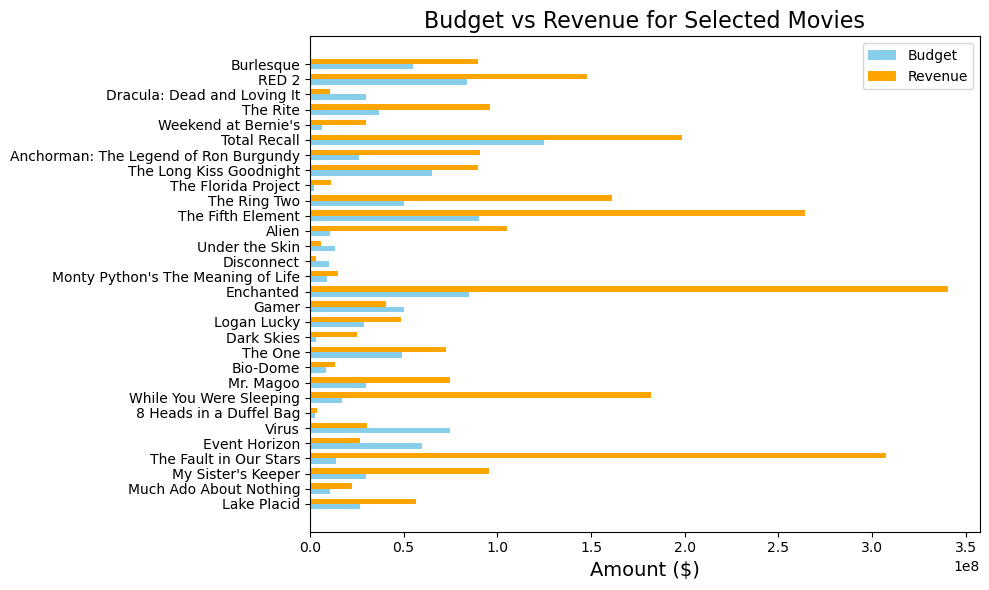

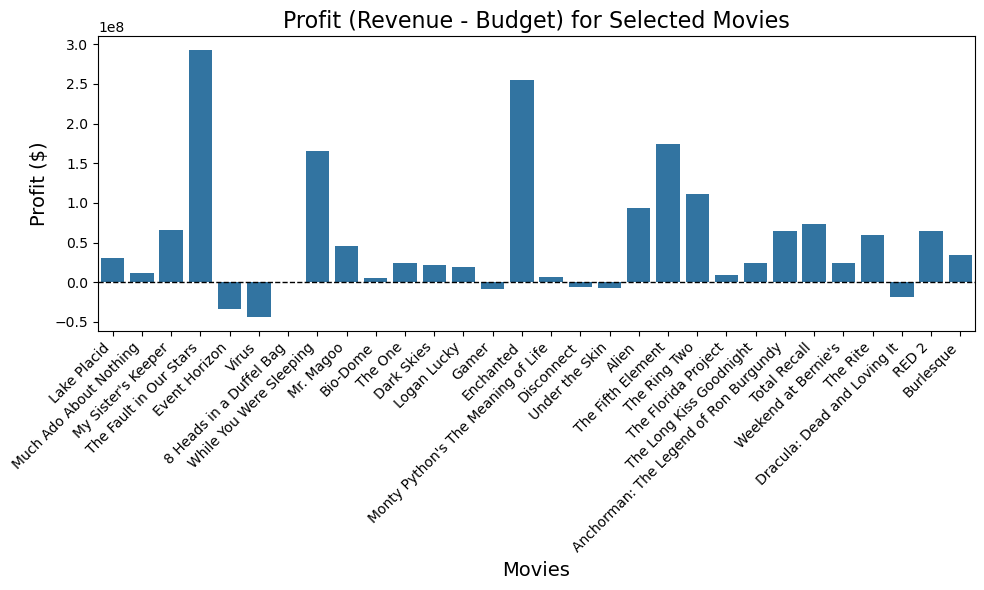

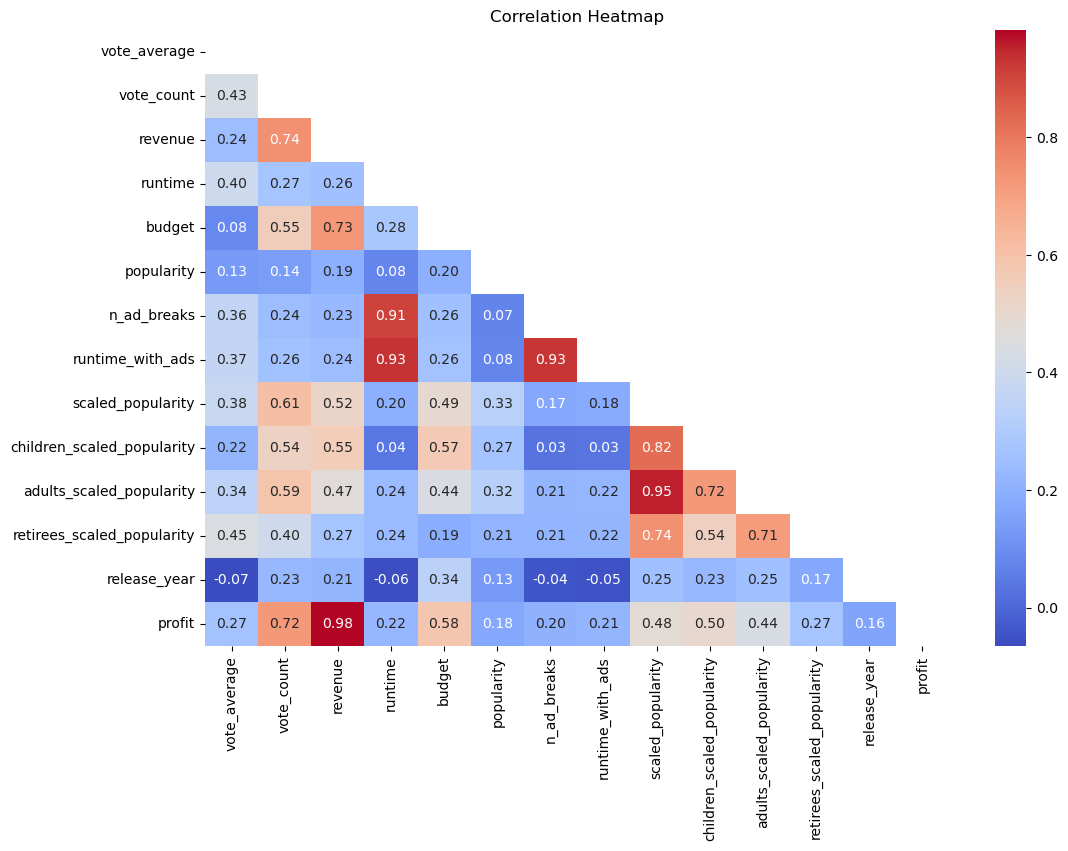

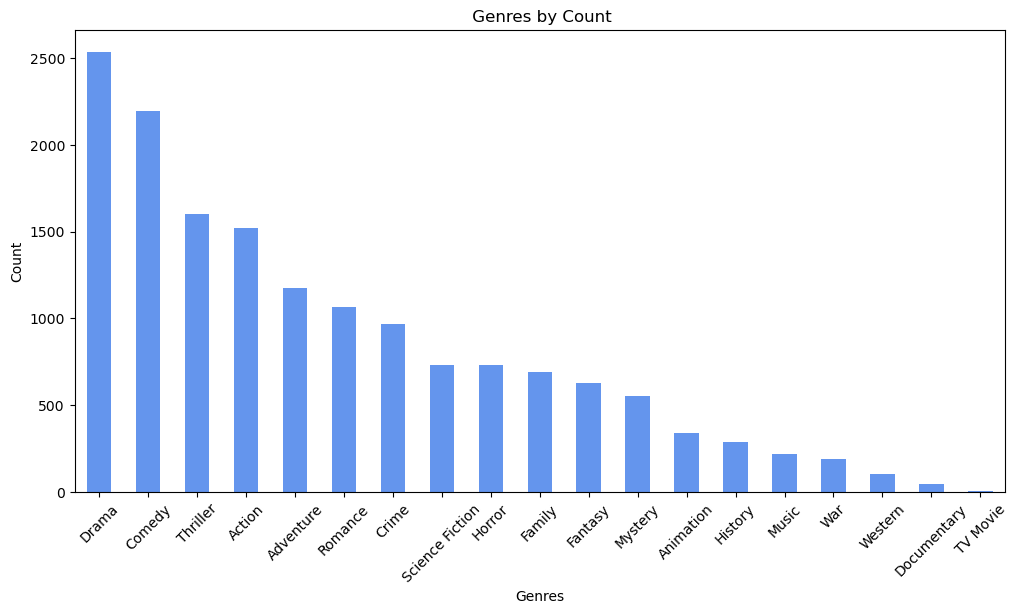


EDA Complete.


In [37]:
analyze_movie_data("data/movie_database.csv")